In [1]:
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm, tnrange

In [2]:
def sigmoid(x, forward=True):
    if forward:
        return 1 / (1 + np.exp(-x))
    else: # this is the derivative of sigmoid (for backprop)
        return x * (1 - x)

In [3]:
def neural_network_forward(inpt, weight1, weight2):
    layer1 = np.matmul(inpt, weight1) # layer 1 matrix multiplication
    layer1_sigmoid = sigmoid(layer1) # layer 1 nonlinearity

    layer2 = np.matmul(layer1_sigmoid, weight2) # layer 2 matrix multiplication

    return layer2, layer1_sigmoid, layer1

In [4]:
def neural_network_backward(inpt, target,
                            layer1, layer1_sigmoid, layer2,
                            weight1, weight2, 
                            learning_rate):

    delta_output = np.zeros(layer2.shape[0]) # output layer error signal
    delta_hidden = np.zeros(layer1.shape[0]) # hidden layer error signal

    weight1gradient = np.zeros(weight1.shape) # gradient 1
    weight2gradient = np.zeros(weight2.shape) # gradient 2

    delta_output = (layer2 - target) # calculate error signal for output layer
    weight2gradient[:,0] = delta_output * layer1_sigmoid # update gradient for output layer
    weight2 -= learning_rate * weight2gradient # update weights for output layer

    delta_hidden = sigmoid(layer1_sigmoid, forward=False) * delta_output * weight2[:,0] # calculate error signal for hidden layer
    weight1gradient[0,:] = delta_hidden * inpt # update gradient for hidden layer
    weight1 -= learning_rate * weight1gradient # update weights for hidden layer

In [5]:
# instantiate some data
x = np.linspace(start=0, stop=2 * np.pi, num=20)
y = np.sin(x)

In [6]:
# define weights
weight1 = np.random.uniform(low=-1, high=1, size=(1,300))
weight2 = np.random.uniform(low=-1, high=1, size=(300,1))

In [7]:
# pre train plotting
pre_train = []
for i in range(x.shape[0]):
    pre_train.append(neural_network_forward([x[i]], weight1, weight2)[0][0])

In [8]:
# training
num_epochs = 20000
learning_rate = 0.001
loss_history = []

for i in tnrange(num_epochs):
    for idx in range(x.shape[0]):
        sample = np.array([x[idx]])
        target = np.array([y[idx]])

        layer2, layer1_sigmoid, layer1 = neural_network_forward(sample, weight1, weight2)

        neural_network_backward(sample, target,
                                layer1, layer1_sigmoid, layer2,
                                weight1, weight2, 
                                learning_rate)

    loss_history.append(.5 * np.square(layer2 - target))

HBox(children=(IntProgress(value=0, max=20000), HTML(value='')))

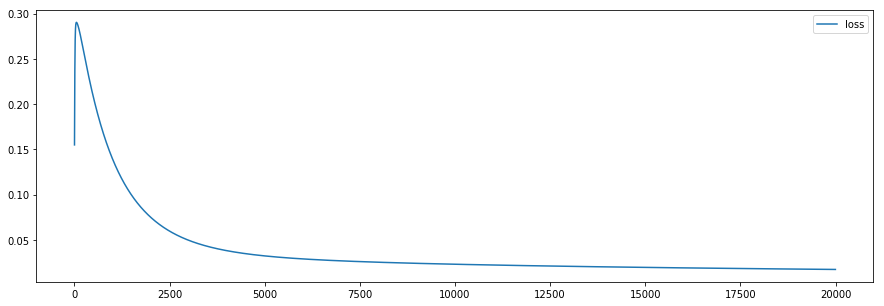

In [9]:
# loss plotting
plt.figure(figsize=(15,5))

plt.plot(loss_history[2:], label='loss')

plt.legend()
plt.show()

In [10]:
# calculate predictions on trained values
post_train = []
for i in range(x.shape[0]):
    post_train.append(neural_network_forward([x[i]], weight1, weight2)[0][0])

# calculate predictions on blind values inside and outside of training domain
blind = np.arange(-2,8,.5)
blind_preds = []
for i in range(blind.shape[0]):
    blind_preds.append(neural_network_forward([blind[i]], weight1, weight2)[0][0])

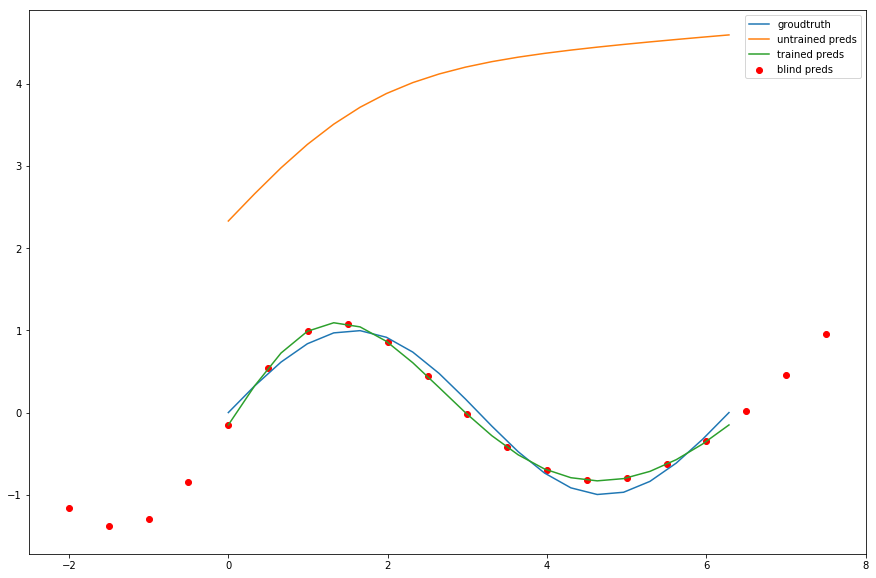

In [11]:
plt.figure(figsize=(15,10))

plt.plot(x, y, label='groudtruth')
plt.plot(x, pre_train, label='untrained preds')
plt.plot(x, post_train, label='trained preds')

plt.scatter(blind, blind_preds, color='red', label='blind preds')

plt.legend()
plt.show()
#plt.savefig('output.png', dpi=300)